<a href="https://colab.research.google.com/github/RamiAmasha31/ABM-applied_mathmatics/blob/main/Final%20Verstion-%20part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Applied Mathematics**
# The following notebook is the code for simulation.
# Part 1 :Simulation

The Agent class is defined as follow:

In [2]:
class Agent:
    def __init__(self, infected, immune, remaining_days_of_infection, remaining_days_of_immunity):
        self.infected = infected
        self.immune = immune
        self.remaining_days_of_infection = remaining_days_of_infection
        self.remaining_days_of_immunity = remaining_days_of_immunity
        self.susceptible=True

The following function for picking two random agents.

In [3]:
import random
def PickTwoAgentsWithContacts(numAgents):
    """
    Randomly selects two different agent indices from the range [0, numAgents-1]
    with a probability of being in contact.

    Parameters:
    - numAgents (int): The total number of agents.
    - contact_prob (float): The probability of two agents being in contact.

    Returns:
    - tuple: A tuple containing two distinct agent indices.
    """
    # Randomly select two initial indices
    index1 = random.randint(0, numAgents - 1)
    index2 = random.randint(0, numAgents - 1)

    # Ensure the selected indices are different
    while index1 == index2 :
        index1 = random.randint(0, numAgents - 1)
        index2 = random.randint(0, numAgents - 1)

    return index1, index2

The following function for initilaizing the agents array

In [4]:
import numpy as np
import random

def start_step(agents,number_of_agents,infected_at_start,immunity_duartion,infection_duration,immunity_mean, immunity_std, infection_mean, infection_std):
  if infected_at_start  > number_of_agents:
            raise ValueError("Number of initially infected agents cannot exceed the total number of agents.")
 ## create agents
  for i in range(0,number_of_agents):
    agents.append(Agent(False,False,np.random.normal(immunity_mean,immunity_std,1),np.random.normal(infection_mean,infection_std,1)))
  ## infect random subset at the start
  infected_indices = random.sample(range(number_of_agents), infected_at_start)
  for index in infected_indices:
        agents[index].infected = True
        agents[index].remaining_days_of_infection = np.random.normal(infection_mean,infection_std,1)
        agents[index].susceptible=False
  return agents

The following code for infecting agent

In [5]:
import random

def infect(agent1,agent2,infection_probability,infection_duration, infection_mean, infection_std):
    random_number = random.random()
    # If agent1 is not infected
    if not agent1.infected and agent2.infected and not agent1.immune and random_number < infection_probability:
        agent1.infected = True
        agent1.remaining_days_of_infection = np.random.normal(infection_mean,infection_std,1)
        #overall_infected += 1
        ##susceptibles-=1
        agent1.susceptible=False
    # If agent2 is not infected
    elif not agent2.infected and agent1.infected and not agent2.immune and random_number < infection_probability:
        agent2.infected = True
        agent2.remaining_days_of_infection = np.random.normal(infection_mean,infection_std,1)
        #overall_infected += 1
        agent2.susceptible=False

        ##susceptibles-=1
    return agent1, agent2

The following code for death and birth

In [6]:
import numpy as np

def Birth_death(agents, birth_pulse, birth_rate_yearly, infected_per_birth_duration, birth_interval, birth_duration, immunity_duration, infection_duration, new_born, deads,N,immunity_mean, immunity_std, infection_mean, infection_std):
    num_new_agents = 0
    num_dead_agents = 0
    b = 0.1
    m=(birth_rate_yearly-b)/int(N)



    # Check if the birth pulse matches the birth interval
    if birth_pulse % birth_interval < birth_duration:
        # Calculate the expected number of new agents over the birth duration
        expected_new_agents_over_duration = birth_rate_yearly * len(agents)

        # Generate the number of new agents using Poisson distribution
        num_new_agents = np.random.poisson(expected_new_agents_over_duration/birth_duration)

        # Create new agents with the specified parameters
        agents = create_new_agents(agents, num_new_agents, infected_per_birth_duration, immunity_duration, infection_duration,immunity_mean, immunity_std, infection_mean, infection_std)
        #new_born.append(num_new_agents)

    # Calculate daily death rate
    death_rate = m * len(agents) + b
    #daily_death_rate = 1 - pow((1 - death_rate), 1 / birth_interval)
    daily_death_rate=death_rate/birth_interval
    #print(daily_death_rate)

    # Generate the number of dead agents using binomial distribution
    num_dead_agents = np.random.binomial(len(agents), daily_death_rate)

    # Remove dead agents
    agents = remove_dead_agents(agents, num_dead_agents)

    return agents, num_new_agents, num_dead_agents

The following code for revmoving dead agents

In [7]:
def remove_dead_agents(agents, num_dead_agents):
    global NumberOfInfected
    if num_dead_agents >= len(agents):
        agents.clear()
    else:
        for _ in range(num_dead_agents):
            index = random.randint(0, len(agents) - 1)
            agents.pop(index)
    return agents

The following code for creating new agents with specifec number of infected agents

In [8]:
def create_new_agents(agents, num_new_agents,infected_per_birth_duration, immunity_duration, infection_duration,immunity_mean, immunity_std, infection_mean, infection_std):
    number=0
    if infected_per_birth_duration > len(agents):
        number = len(agents)
    else :
      number=infected_per_birth_duration

    for i in range(num_new_agents):
        if i < number:
            agents.append(Agent(True,False,np.random.normal(immunity_mean,immunity_std,1),np.random.normal(infection_mean,infection_std,1)))

        else:
            agents.append(Agent(False,False,np.random.normal(immunity_mean,immunity_std,1),np.random.normal(infection_mean,infection_std,1)))

    return agents

The following code is for updating the parameters after each simulation step

In [9]:
def update_params(agents, immunity_duration,Overall_infected,susceptibles,immunity_mean, immunity_std):
    for i in range(len(agents)):
        if agents[i].infected:
            # If the agent is infected
            agents[i].remaining_days_of_infection -= 1

            if agents[i].remaining_days_of_infection < 0:
                # The agent has ended the duration of infection and started the immunity duration
                agents[i].infected = False
                agents[i].immune = True
                agents[i].remaining_days_of_immunity = np.random.normal(immunity_mean,immunity_std,1)
                #Overall_infected -= 1

        else:
            if agents[i].immune:
                # The agent is immune
                agents[i].remaining_days_of_immunity -= 1

                if agents[i].remaining_days_of_immunity < 0:
                    # The agent has ended the immunity duration
                    agents[i].immune = False
                   # susceptibles+=1
                    agents[i].susceptible=True
    Overall_infected=sum(agent.infected == True for agent in agents)

    susceptibles=sum(agent.susceptible == True for agent in agents)
    return agents,Overall_infected,susceptibles

The following code is the main simulation

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
def simulation_run(number_of_agents, simulation_duration1, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_,
                             immunity_mean, immunity_std, infection_mean, infection_std):
  ##parameters
  infection_duration=60
  immunity_duration=180
  number_of_agents=number_of_agents
  simulation_duration=simulation_duration1 # Fix: Use the correct variable name here
  birth_rate_yearly=birth_rate_yearly
  birth_interval=365
  birth_duration=birth_duration
  infected_at_start=infected_at_start
  new_born=[0]* int(simulation_duration1)
  infected=[0]* int(simulation_duration1)
  deads=[0]* int(simulation_duration1)
  birth_pulse=0
  susceptibles= [0]* int(simulation_duration1)
  sus=0
  infected=0
  num_new_birhths=0
  overALL_infected=[0]* int(simulation_duration1)
  ##
  infected_per_birth_duration=0
  number_of_interactions_per_day_per_agent=1/10
  R0=R0_
  TMP=infection_duration*number_of_interactions_per_day_per_agent
  infection_probability=float(R0)/TMP
  N=N_
  overall_infected=0
  ##

  agents=[]
  agents=start_step(agents,number_of_agents,infected_at_start,immunity_duration,infection_duration,immunity_mean, immunity_std, infection_mean, infection_std)
  overALL_infected[0]=(infected_at_start)
  susceptibles.append(len(agents)-infected_at_start)
  number_of_interactions_per_day = int(len(agents) *number_of_interactions_per_day_per_agent // 2)



  for i in range(simulation_duration1):
    for j in range(number_of_interactions_per_day):
      index1, index2 = PickTwoAgentsWithContacts(len(agents))
      agent1, agent2=infect(agents[index1],agents[index2],infection_probability,infection_duration, infection_mean, infection_std)
    birth_pulse += 1
    agents, num_dead_agents,num_new_birhths=Birth_death(agents,birth_pulse,birth_rate_yearly,infected_per_birth_duration,birth_interval,birth_duration,immunity_duration,infection_duration,new_born,deads,N,immunity_mean, immunity_std, infection_mean, infection_std)
    deads[i]=(num_dead_agents)
    new_born[i]=num_new_birhths
    agents,infected,sus=update_params(agents, immunity_duration,infected,sus,immunity_mean, immunity_std)
    susceptibles[i]=(sus)
    overALL_infected[i]=(infected)

  return overALL_infected,susceptibles,new_born,deads



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
import pandas as pd
import time  # Import time for simulating a delay (replace with actual simulation function)
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt
# Function to run simulation with parameters
def run_simulation_with_params(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_, right_box):
    # Display loading animation or message
    right_box.clear_output()
    with right_box:
        display(HTML('<p style="font-size:18px; color:blue;">Running simulation...</p>'))

    # Simulate the data (replace with actual simulation function)
    time.sleep(2)  # Simulate a 2-second delay (replace with actual simulation function call)
    results = simulation_run(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_,
                             immunity_mean_slider.value, immunity_std_slider.value, infection_mean_slider.value, infection_std_slider.value)

    # Plot and display results
    right_box.clear_output()
    plot_simulation_results(results)
    display_parameter_values(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_)

# Function to plot simulation results
def plot_simulation_results(results):
    overALL_infected, susceptibles, new_born, deads = results
    plt.figure(figsize=(12, 8))
    plt.plot(overALL_infected, label='Infected')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected Agents')
    plt.title('Number of Infected Agents Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to display current parameter values
def display_parameter_values(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_):
    params = {
        'Number of Agents': number_of_agents,
        'Simulation Duration': simulation_duration,
        'Birth Rate Yearly': birth_rate_yearly,
        'Birth Duration': birth_duration,
        'Infected at Start': infected_at_start,
        'R0': R0_,
        'N': N_,
        'Immunity Mean': immunity_mean_slider.value,
        'Immunity STD': immunity_std_slider.value,
        'Infection Mean': infection_mean_slider.value,
        'Infection STD': infection_std_slider.value
    }

    changed_param = None
    for slider in sliders:
        if slider.value != slider.default_value:
            changed_param = slider.description

    html = "<h3>Current Parameter Values</h3><ul>"
    for key, value in params.items():
        if key == changed_param:
            html += f"<li><strong>{key}: {value} (changed)</strong></li>"
        else:
            html += f"<li>{key}: {value}</li>"
    html += "</ul>"
    display(HTML(html))

# Define the interactive widgets
number_of_agents_slider = widgets.IntSlider(value=500, min=100, max=1000, step=50, description='Number of Agents')
simulation_duration_slider = widgets.IntSlider(value=30000, min=5000, max=50000, step=5000, description='Simulation Duration')
birth_rate_yearly_slider = widgets.FloatSlider(value=0.3, min=0.1, max=1.0, step=0.1, description='Birth Rate Yearly')
birth_duration_slider = widgets.IntSlider(value=365, min=100, max=500, step=50, description='Birth Duration')
infected_at_start_slider = widgets.IntSlider(value=5, min=1, max=20, step=1, description='Infected at Start')
R0_slider = widgets.FloatSlider(value=2.0, min=0.5, max=5.0, step=0.5, description='R0')
N_slider = widgets.IntSlider(value=500, min=100, max=1000, step=50, description='N')
immunity_mean_slider = widgets.FloatSlider(value=180, min=0, max=365, step=10, description='Immunity Mean')
immunity_std_slider = widgets.FloatSlider(value=60, min=0, max=100, step=5, description='Immunity STD')
infection_mean_slider = widgets.FloatSlider(value=60, min=1, max=365, step=10, description='Infection Mean')
infection_std_slider = widgets.FloatSlider(value=20, min=0, max=180, step=10, description='Infection STD')

# List of sliders for checking changed values
sliders = [
    number_of_agents_slider,
    simulation_duration_slider,
    birth_rate_yearly_slider,
    birth_duration_slider,
    infected_at_start_slider,
    R0_slider,
    N_slider,
    immunity_mean_slider,
    immunity_std_slider,
    infection_mean_slider,
    infection_std_slider
]

# Save default values to sliders
for slider in sliders:
    slider.default_value = slider.value

# Define the interactive button
run_button = widgets.Button(description='Run Simulation')

# Function to update and run the simulation
def on_run_button_clicked(b):
    number_of_agents = number_of_agents_slider.value
    simulation_duration = simulation_duration_slider.value
    birth_rate_yearly = birth_rate_yearly_slider.value
    birth_duration = birth_duration_slider.value
    infected_at_start = infected_at_start_slider.value
    R0_ = R0_slider.value
    N_ = N_slider.value
    run_simulation_with_params(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, N_, right_box)

run_button.on_click(on_run_button_clicked)

# Create a container for the widgets and the plot
left_box = widgets.VBox([
    number_of_agents_slider,
    simulation_duration_slider,
    birth_rate_yearly_slider,
    birth_duration_slider,
    infected_at_start_slider,
    R0_slider,
    N_slider,
    immunity_mean_slider,
    immunity_std_slider,
    infection_mean_slider,
    infection_std_slider,
    run_button
], layout=widgets.Layout(width='40%'))  # Adjust width as needed

right_box = widgets.Output()

# Display the widgets and the plot side by side
display(widgets.HBox([left_box, right_box]))

#  Part 2 : Investigation of the effect of R0

> Add blockquote


in this section we are going to invistigate the effect of different parameters on the number of infected people

## Objective:
To analyze the impact of varying the basic reproduction number (𝑅₀) on the spread of an infectious disease within a simulated population, focusing on the mean number of infected individuals and the prevalence of the disease.

## Parameters:
- **Number of Agents**: 1000
- **Simulation Duration**: 3000 days
- **Yearly Birth Rate**: 0.3
- **Birth Duration**: 365 days
- **Initial Infected Individuals**: 10
- **N (parameter specific to the simulation)**: 500
- **Range of 𝑅₀**: 1.0 to 4.0 (10 evenly spaced values)
## Results:

### Mean Number of Infected Individuals:
- The mean number of infected individuals increases with higher 𝑅₀ values.
- As 𝑅₀ increases, each infected individual infects more people on average, leading to larger outbreaks.
- The standard deviation of the number of infected individuals also increases with higher 𝑅₀. This is due to the greater variability introduced by higher transmission rates and the exponential growth of infections, which leads to larger fluctuations.

### Prevalence of the Disease:
- Prevalence, defined as the proportion of infected individuals relative to the total population, also increases with higher 𝑅₀ values.
- Higher 𝑅₀ values result in a larger fraction of the population being infected at any given time, as more people are exposed and infected.
- The increase in prevalence reflects the greater ability of the disease to sustain and spread through the population with higher transmission rates.

## Visualizations:

### Mean Infected Individuals with Standard Deviation:
- The plot shows the mean number of infected individuals for each 𝑅₀ value, with error bars representing the standard deviation.
- This visualization highlights the increase in both the mean and variability of infections with higher 𝑅₀ values.

### Prevalence of the Disease:
- The plot shows the prevalence of the disease (proportion of infected individuals) for each 𝑅₀ value.
- This demonstrates the increasing fraction of the population infected as 𝑅₀ rises.

## Conclusion:
- **Higher 𝑅₀ Values Lead to More Severe Outbreaks**: The simulations confirm that higher 𝑅₀ values result in more significant disease spread, with both a higher mean number of infected individuals and greater prevalence.
- **Increased Variability**: Larger 𝑅₀ values not only increase the average number of infections but also introduce more variability, making the outbreak outcomes less predictable.




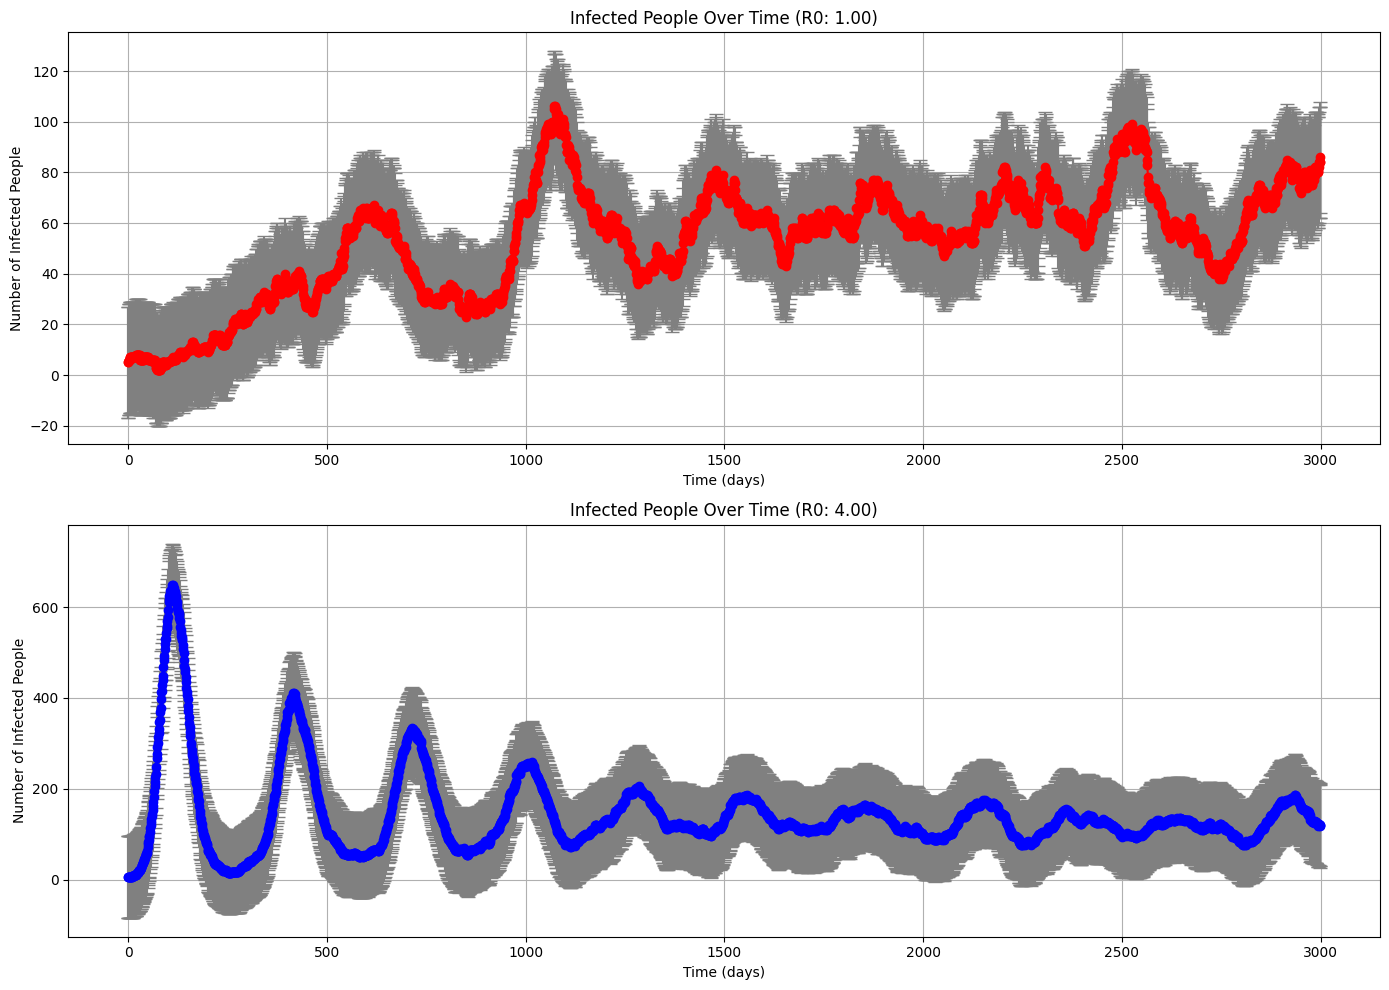

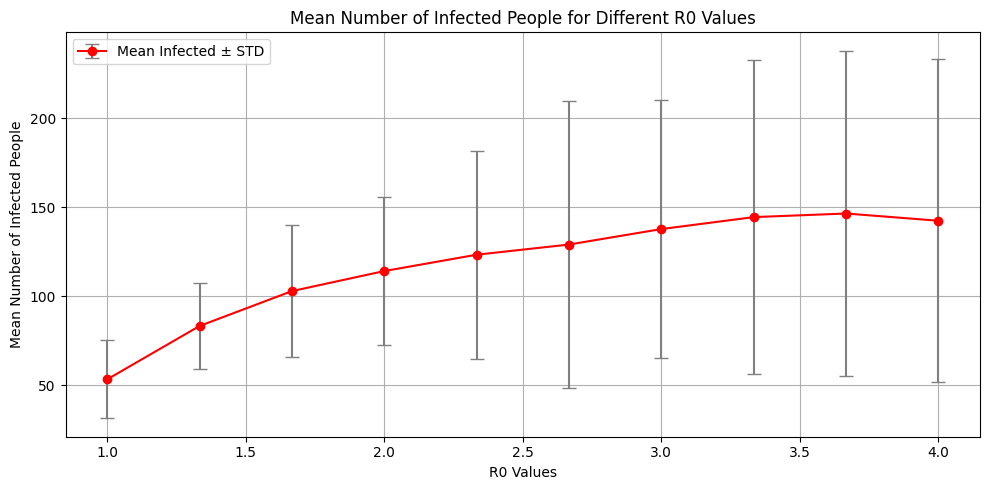

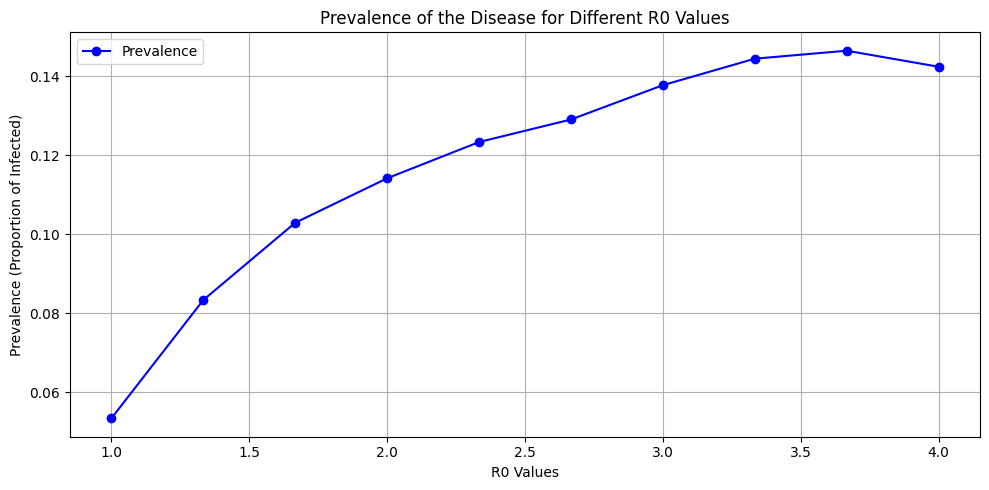

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
number_of_agents = 1000
simulation_duration = 3000
birth_rate_yearly = 0.3
birth_duration = 365
infected_at_start = 5
N_ = 500
immunity_mean=180
immunity_std=60
infection_mean=60
infection_std=20
# Step 1: Define the array of R0 values
R0_values = np.linspace(1.0, 4.0, 10)  # Example: 10 values from 1.0 to 4.0

# Step 2: Run the simulation for each R0 value
mean_infected_per_R0 = []
std_infected_per_R0 = []
prevalence_per_R0 = []
infected_over_time_per_R0 = []

for R0 in R0_values:
    # Assuming simulation_run returns a list/array of infected people counts over time
    infected_over_time, _, _, _ = simulation_run(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0, N_,immunity_mean, immunity_std, infection_mean, infection_std)

    # Compute the mean and standard deviation of the number of infected people over the simulation duration
    mean_infected = np.mean(infected_over_time)
    std_infected = np.std(infected_over_time)

    mean_infected_per_R0.append(mean_infected)
    std_infected_per_R0.append(std_infected)

    # Compute the prevalence over the simulation duration
    prevalence = mean_infected / number_of_agents
    prevalence_per_R0.append(prevalence)

    # Store infected over time for plotting
    infected_over_time_per_R0.append(infected_over_time)

# Convert to numpy arrays for easier manipulation
mean_infected_per_R0 = np.array(mean_infected_per_R0)
std_infected_per_R0 = np.array(std_infected_per_R0)
prevalence_per_R0 = np.array(prevalence_per_R0)

# Plotting the first and last two R0 values with their STDs
plt.figure(figsize=(14, 10))

# Plot for the first R0 value
plt.subplot(2, 1, 1)
plt.errorbar(range(simulation_duration), infected_over_time_per_R0[0], yerr=std_infected_per_R0[0], fmt='o-', color='red', ecolor='gray', capsize=5)
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (R0: {R0_values[0]:.2f})')
plt.grid(True)

# Plot for the second R0 value
plt.subplot(2, 1, 2)
plt.errorbar(range(simulation_duration), infected_over_time_per_R0[-1], yerr=std_infected_per_R0[-1], fmt='o-', color='blue', ecolor='gray', capsize=5)
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (R0: {R0_values[-1]:.2f})')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot R0 values vs their corresponding mean infected people with error bars
plt.figure(figsize=(10, 5))

plt.errorbar(R0_values, mean_infected_per_R0, yerr=std_infected_per_R0, fmt='o-', color='red', ecolor='gray', capsize=5, label='Mean Infected ± STD')
plt.xlabel('R0 Values')
plt.ylabel('Mean Number of Infected People')
plt.title('Mean Number of Infected People for Different R0 Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot R0 values vs their corresponding prevalence
plt.figure(figsize=(10, 5))

plt.plot(R0_values, prevalence_per_R0, marker='o', linestyle='-', color='blue', label='Prevalence')
plt.xlabel('R0 Values')
plt.ylabel('Prevalence (Proportion of Infected)')
plt.title('Prevalence of the Disease for Different R0 Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Part 3: Investigation of the Effect of Carrying Capacity

### Mean Number of Infected People and Prevalence Analysis

**Parameters:**
- Simulation Duration: 3000 days
- Yearly Birth Rate: 0.3
- Duration of Birth Process: 365 days
- Initial Infected Individuals: 5
- Number of Agents: 1000

### Mean Number of Infected People for Different Carrying Capacity Values

- **Observation**: The mean number of infected individuals varies with different carrying capacity values (\(N\)).
- **Explanation**: Carrying capacity affects the environment's ability to sustain the population, influencing the spread of the disease.
- **Visualization**: The plot shows how mean infected counts change with varying carrying capacity values. Error bars (standard deviation) indicate variability around the mean.

### Prevalence of the Disease for Different Carrying Capacity Values

- **Observation**: Prevalence, defined as the proportion of infected individuals relative to the total population, is influenced by the carrying capacity values.
- **Explanation**: Different carrying capacities alter the overall dynamics of the population, affecting the proportion of infected individuals.
- **Visualization**: The prevalence plot demonstrates how different carrying capacity values affect the proportion of infected individuals relative to the total population.

### Impact of Carrying Capacity on Disease Spread

- **Observation**: When the carrying capacity (\(N\)) increases in the simulation, the prevalence of the disease tends to change.
- **Explanation**: Changes in carrying capacity affect the population's structure and density, thereby impacting disease spread and prevalence.
- **Visualization**: The plot of prevalence versus carrying capacity shows how the disease prevalence is influenced by different carrying capacity values.

## Results

The simulations provided valuable insights into the dynamics of disease spread within a simulated population under varying conditions:

- **Carrying Capacity and Disease Spread**: The simulations confirm that carrying capacity significantly impacts disease dynamics, as evidenced by changes in mean infected counts and prevalence.
- **Environmental Limits**: Increasing or decreasing carrying capacity affects the environment's ability to support the population, influencing how the disease spreads within the population.

These findings underscore the importance of carrying capacity in understanding and controlling the spread of infectious diseases within simulated populations.


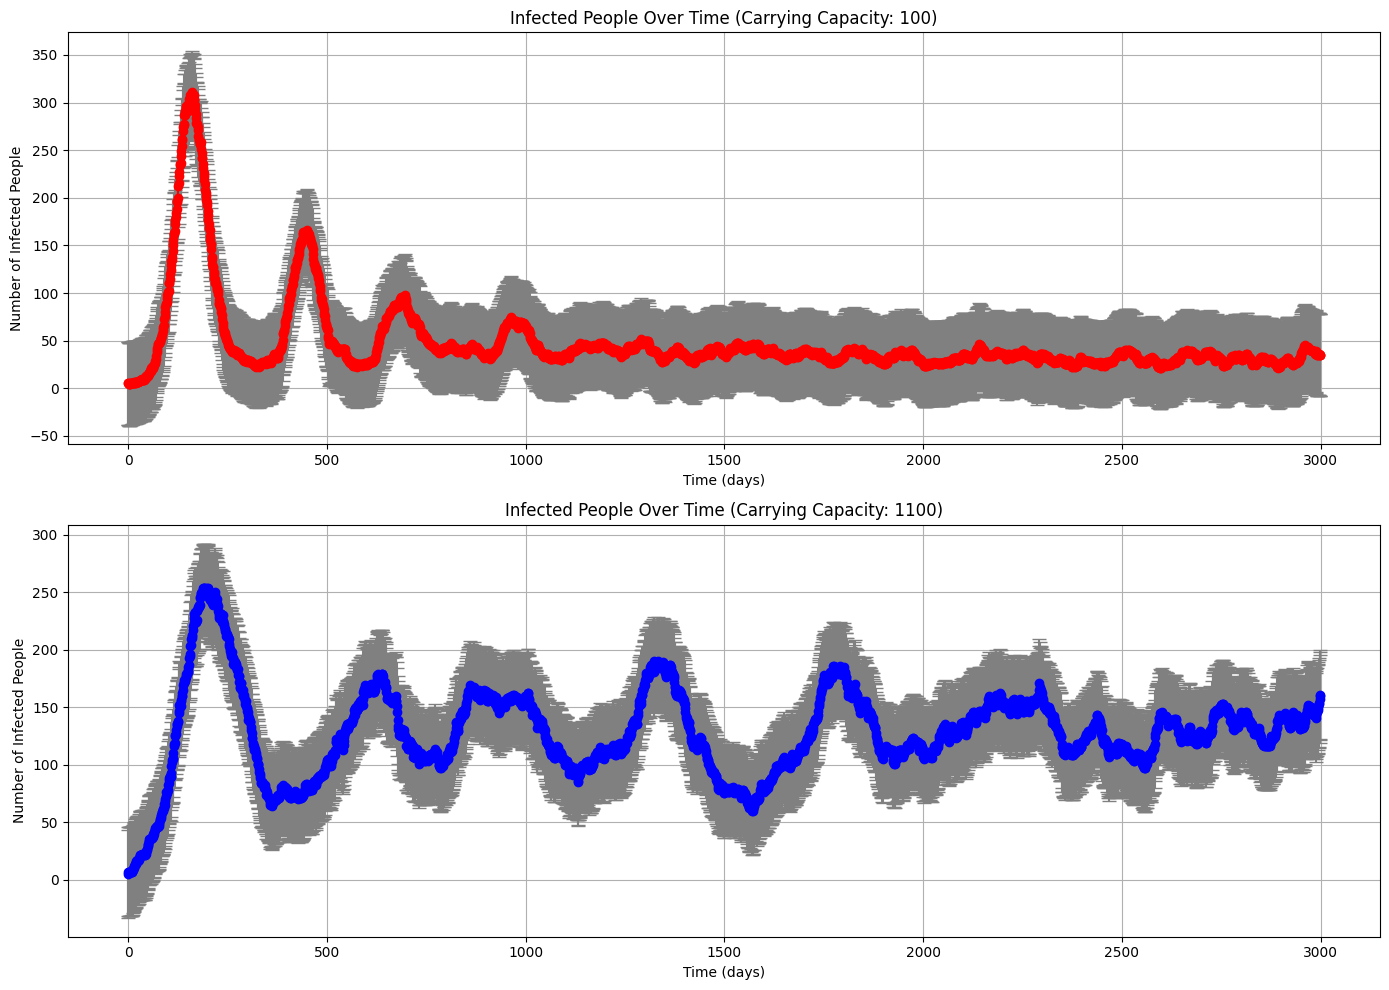

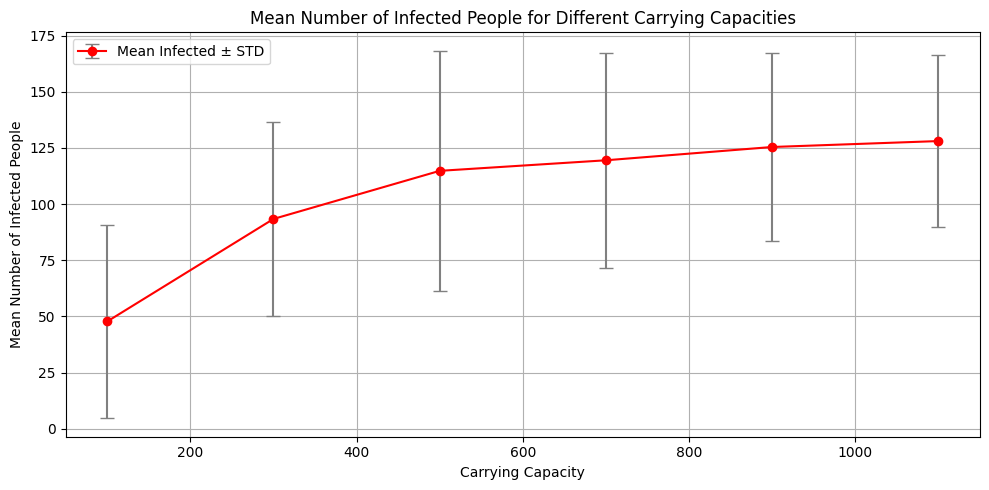

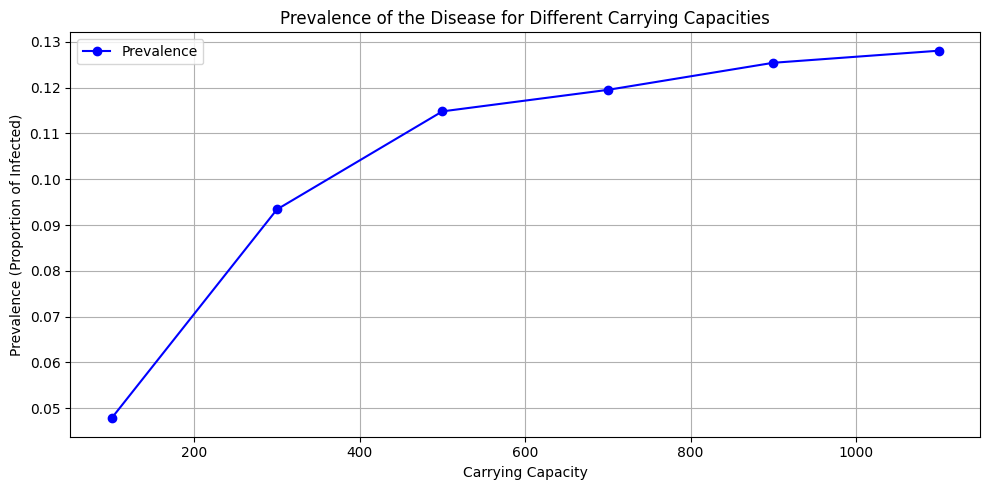

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
number_of_agents = 1000  # Number of agents (constant)
simulation_duration = 3000  # Duration of the simulation in days
birth_rate_yearly = 0.3  # Yearly birth rate
birth_duration = 365  # Duration of the birth process in days
infected_at_start = 5  # Initial number of infected individuals
R0_ = 2
immunity_mean = 180  # Keep immunity_mean constant
immunity_std = 60  # Keep immunity_std constant
infection_mean = 60  # Keep infection_mean constant
infection_std = 20  # Standard deviation of infection duration (keep constant)
# Define the array of carrying capacity values to investigate
carrying_capacity_values = np.array([100, 300, 500, 700, 900, 1100])

# Step 1: Run the simulation for each carrying capacity value
mean_infected_per_carrying_capacity = []
std_infected_per_carrying_capacity = []
prevalence_per_carrying_capacity = []
infected_over_time_per_carrying_capacity = []

for carrying_capacity in carrying_capacity_values:
    # Assuming simulation_run returns a list/array of infected people counts over time
    infected_over_time, _, _, _ = simulation_run(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration, infected_at_start, R0_, carrying_capacity, immunity_mean, immunity_std, infection_mean, infection_std)

    # Compute the mean and standard deviation of the number of infected people over the simulation duration
    mean_infected = np.mean(infected_over_time)
    std_infected = np.std(infected_over_time)

    mean_infected_per_carrying_capacity.append(mean_infected)
    std_infected_per_carrying_capacity.append(std_infected)

    # Compute the prevalence over the simulation duration
    prevalence = mean_infected / number_of_agents
    prevalence_per_carrying_capacity.append(prevalence)

    # Store infected over time for plotting
    infected_over_time_per_carrying_capacity.append(infected_over_time)

# Convert to numpy arrays for easier manipulation
mean_infected_per_carrying_capacity = np.array(mean_infected_per_carrying_capacity)
std_infected_per_carrying_capacity = np.array(std_infected_per_carrying_capacity)
prevalence_per_carrying_capacity = np.array(prevalence_per_carrying_capacity)

# Plotting the infected graphs for the first and last carrying capacity values
plt.figure(figsize=(14, 10))

# Plot for the first carrying capacity value
plt.subplot(2, 1, 1)
plt.errorbar(range(simulation_duration), infected_over_time_per_carrying_capacity[0], yerr=std_infected_per_carrying_capacity[0], fmt='o-', color='red', ecolor='gray', capsize=5)
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Carrying Capacity: {carrying_capacity_values[0]})')
plt.grid(True)

# Plot for the last carrying capacity value
plt.subplot(2, 1, 2)
plt.errorbar(range(simulation_duration), infected_over_time_per_carrying_capacity[-1], yerr=std_infected_per_carrying_capacity[-1], fmt='o-', color='blue', ecolor='gray', capsize=5)
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Carrying Capacity: {carrying_capacity_values[-1]})')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot carrying capacity values vs their corresponding mean infected people with error bars
plt.figure(figsize=(10, 5))

plt.errorbar(carrying_capacity_values, mean_infected_per_carrying_capacity, yerr=std_infected_per_carrying_capacity, fmt='o-', color='red', ecolor='gray', capsize=5, label='Mean Infected ± STD')
plt.xlabel('Carrying Capacity')
plt.ylabel('Mean Number of Infected People')
plt.title('Mean Number of Infected People for Different Carrying Capacities')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot carrying capacity values vs their corresponding prevalence
plt.figure(figsize=(10, 5))

plt.plot(carrying_capacity_values, prevalence_per_carrying_capacity, marker='o', linestyle='-', color='blue', label='Prevalence')
plt.xlabel('Carrying Capacity')
plt.ylabel('Prevalence (Proportion of Infected)')
plt.title('Prevalence of the Disease for Different Carrying Capacities')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Part 4 : invstigate the infection mean and std


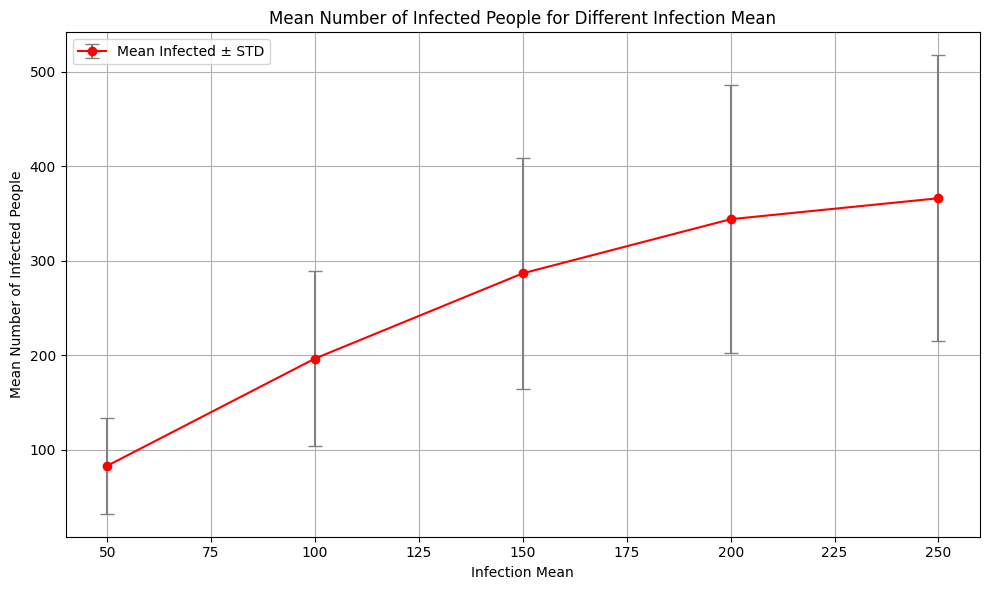

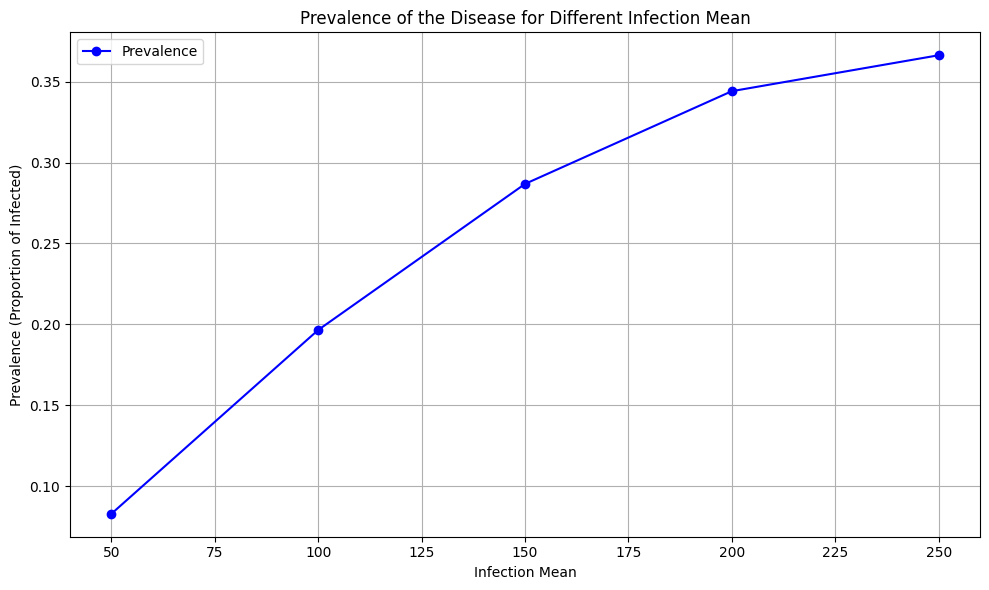

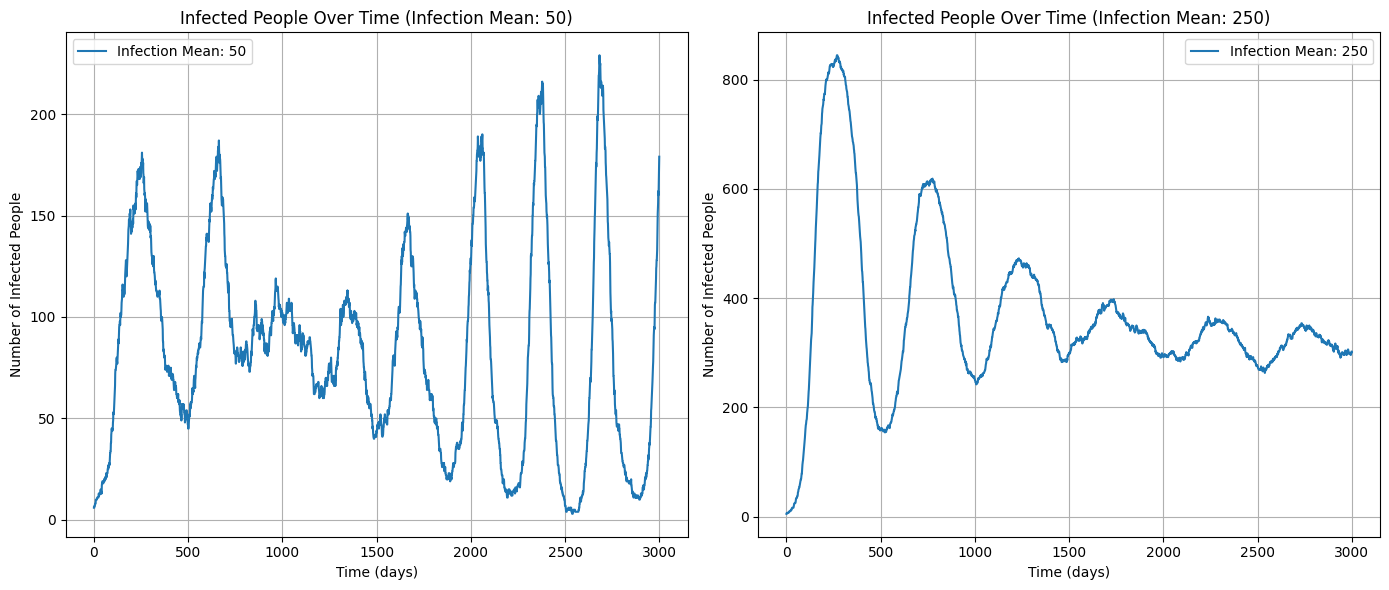

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
number_of_agents = 1000  # Number of agents (constant)
simulation_duration = 3000  # Duration of the simulation in days
birth_rate_yearly = 0.3  # Yearly birth rate
birth_duration = 365  # Duration of the birth process in days
infected_at_start = 5  # Initial number of infected individuals
N_ = 500  # Parameter specific to the simulation
R0_ = 2
immunity_mean = 180  # Keep immunity_mean constant
immunity_std = 60  # Keep immunity_std constant

# Define the array of infection mean values to investigate
infection_mean_values = np.array([50, 100, 150, 200, 250])  # Example values to investigate
infection_std = 20  # Standard deviation of infection duration (keep constant)

# Step 1: Run the simulation for each infection_mean value
mean_infected_per_infection = []
std_infected_per_infection = []
prevalence_per_infection = []
infected_over_time_per_infection = []

for mean_infection in infection_mean_values:
    # Assuming simulation_run returns a list/array of infected people counts over time
    infected_over_time, _, _, _ = simulation_run(number_of_agents, simulation_duration, birth_rate_yearly, birth_duration,
                                                 infected_at_start, R0_, N_, immunity_mean, immunity_std, mean_infection, infection_std)

    # Compute the mean and standard deviation of the number of infected people over the simulation duration
    mean_infected = np.mean(infected_over_time)
    std_infected = np.std(infected_over_time)

    mean_infected_per_infection.append(mean_infected)
    std_infected_per_infection.append(std_infected)

    # Compute the prevalence over the simulation duration
    prevalence = mean_infected / number_of_agents
    prevalence_per_infection.append(prevalence)

    # Store infected over time for the first and last infection_mean values
    if mean_infection == infection_mean_values[0] or mean_infection == infection_mean_values[-1]:
        infected_over_time_per_infection.append((mean_infection, infected_over_time))

# Convert to numpy arrays for easier manipulation
mean_infected_per_infection = np.array(mean_infected_per_infection)
std_infected_per_infection = np.array(std_infected_per_infection)
prevalence_per_infection = np.array(prevalence_per_infection)

# Plotting the impact of infection_mean on mean infected people and prevalence
plt.figure(figsize=(10, 6))

plt.errorbar(infection_mean_values, mean_infected_per_infection, yerr=std_infected_per_infection, fmt='o-', color='red', ecolor='gray', capsize=5, label='Mean Infected ± STD')
plt.xlabel('Infection Mean')
plt.ylabel('Mean Number of Infected People')
plt.title('Mean Number of Infected People for Different Infection Mean')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting prevalence for different infection_mean values
plt.figure(figsize=(10, 6))

plt.plot(infection_mean_values, prevalence_per_infection, marker='o', linestyle='-', color='blue', label='Prevalence')
plt.xlabel('Infection Mean')
plt.ylabel('Prevalence (Proportion of Infected)')
plt.title('Prevalence of the Disease for Different Infection Mean')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# Plotting infected people over time for the first and last infection_mean values
plt.figure(figsize=(14, 6))
# Plot for the first infection_mean value
mean_infection_first, infected_over_time_first = infected_over_time_per_infection[0]
plt.subplot(1, 2, 1)
plt.plot(range(simulation_duration), infected_over_time_first, label=f'Infection Mean: {mean_infection_first}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Infection Mean: {mean_infection_first})')
plt.legend()
plt.grid(True)

# Plot for the last infection_mean value
mean_infection_last, infected_over_time_last = infected_over_time_per_infection[-1]
plt.subplot(1, 2, 2)
plt.plot(range(simulation_duration), infected_over_time_last, label=f'Infection Mean: {mean_infection_last}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Infection Mean: {mean_infection_last})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Part 5 : Invistigating the yaerly birth rate
## Why Higher Yearly Birth Rate Leads to Lower Prevalence

The prevalence of a disease is defined as the proportion of the population that is infected at a given time. When the yearly birth rate increases, the prevalence can decrease for several reasons related to the dynamics of population growth and disease spread:

1. **Increased Population Growth**:
   - A higher birth rate leads to a faster increase in the overall population size. While the absolute number of infected individuals might remain similar or increase, the proportion of infected individuals (prevalence) decreases because the total population grows more rapidly.

2. **Dilution Effect**:
   - With a higher birth rate, more individuals are being added to the susceptible pool. This increases the number of healthy, uninfected individuals, effectively diluting the proportion of infected individuals within the population.

3. **Shorter Duration of High Prevalence**:
   - As new susceptible individuals are continuously added to the population, the disease might spread more quickly initially, but the overall prevalence remains lower because the influx of new, uninfected individuals counteracts the proportion of the population that gets infected.

4. **Resource Limitation for Pathogen Spread**:
   - A larger, more rapidly growing population can potentially have different social structures, health care responses, or behavioral changes that affect how the disease spreads, potentially reducing the transmission rate per infected individual.

#### Example Calculation:

Consider two scenarios with different birth rates:

- **Scenario A** (Lower Birth Rate):
  - Total population starts at 1000.
  - 100 individuals are infected.
  - Prevalence: \( \frac{100}{1000} = 10\% \).

- **Scenario B** (Higher Birth Rate):
  - Total population grows to 2000 due to a higher birth rate.
  - 150 individuals are infected.
  - Prevalence: \( \frac{150}{2000} = 7.5\% \).

In Scenario B, even though there are more infected individuals in absolute numbers, the prevalence is lower because the population has grown more significantly.

#### Summary:

When the yearly birth rate is higher, the prevalence tends to be smaller because the population increases more rapidly, adding more susceptible individuals and thereby reducing the proportion of the population that is infected at any given time. This dynamic is a crucial aspect of understanding how population growth and disease spread interact in epidemiological models.

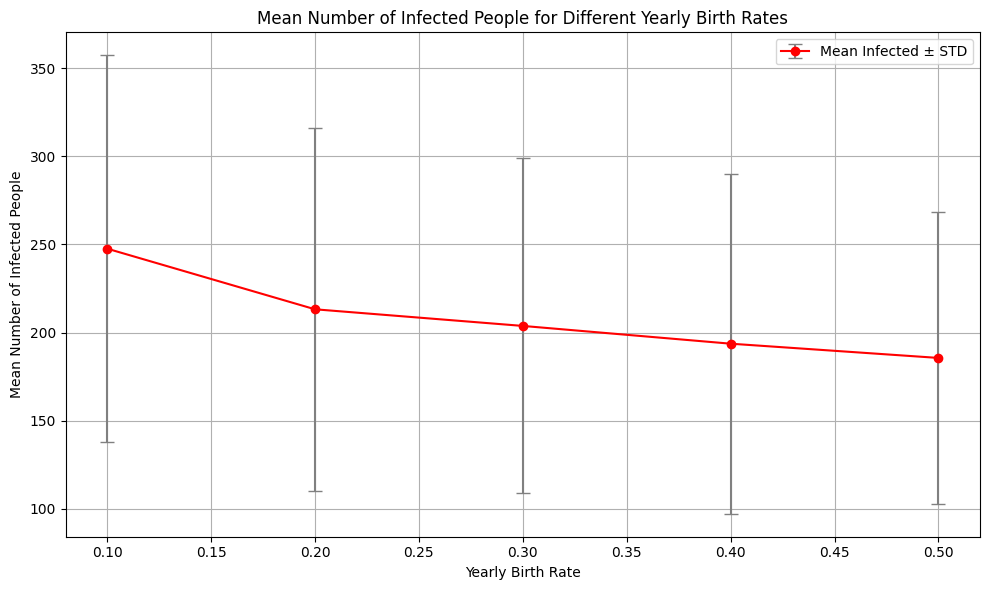

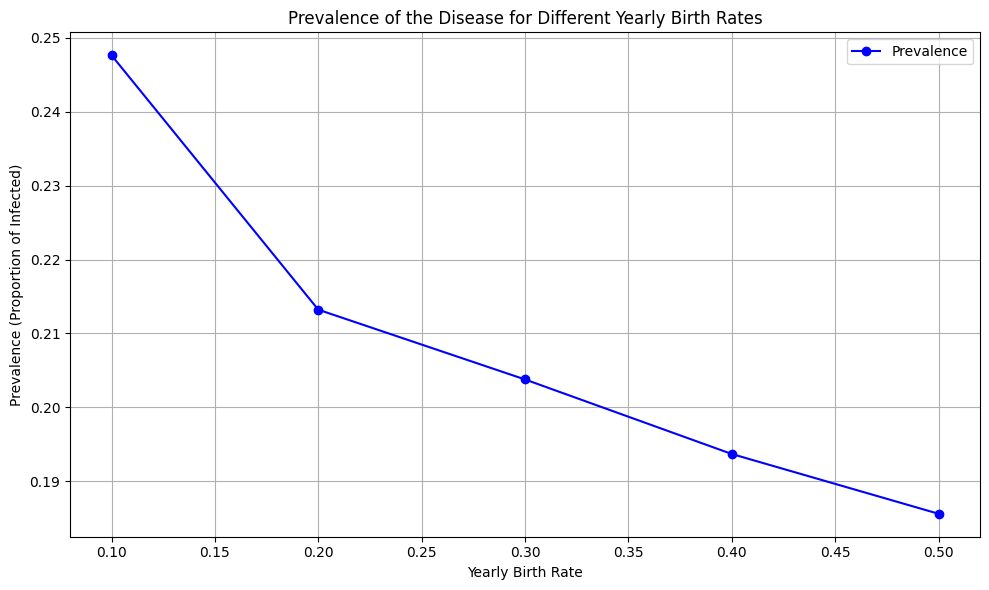

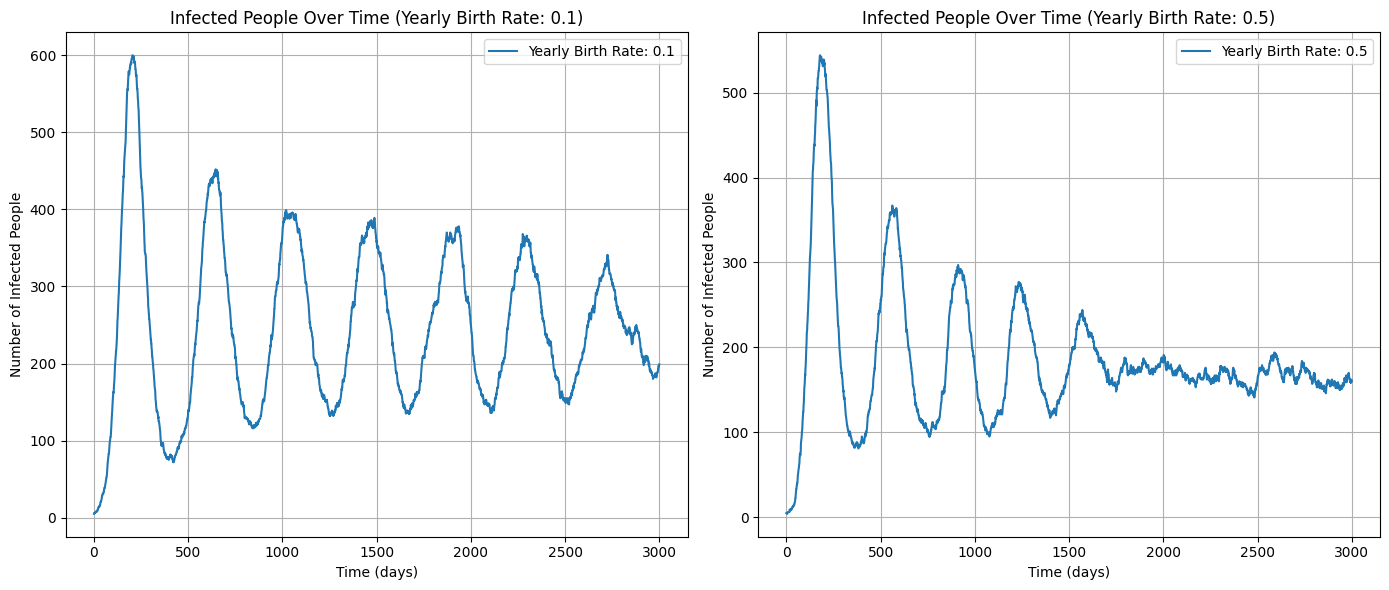

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
number_of_agents = 1000  # Number of agents (constant)
simulation_duration = 3000  # Duration of the simulation in days
birth_rate_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Example birth rates to investigate
birth_duration = 365  # Duration of the birth process in days
infected_at_start = 5  # Initial number of infected individuals
N_ = 500  # Parameter specific to the simulation
R0_ = 2
immunity_mean = 180  # Keep immunity_mean constant
immunity_std = 60  # Keep immunity_std constant
infection_mean = 100  # Keep infection_mean constant
infection_std = 20  # Standard deviation of infection duration (keep constant)

# Step 1: Run the simulation for each birth rate value
mean_infected_per_birth_rate = []
std_infected_per_birth_rate = []
prevalence_per_birth_rate = []
infected_over_time_per_birth_rate = []

for birth_rate in birth_rate_values:
    # Assuming simulation_run returns a list/array of infected people counts over time
    infected_over_time, _, _, _ = simulation_run(number_of_agents, simulation_duration, birth_rate, birth_duration,
                                                 infected_at_start, R0_, N_, immunity_mean, immunity_std, infection_mean, infection_std)

    # Compute the mean and standard deviation of the number of infected people over the simulation duration
    mean_infected = np.mean(infected_over_time)
    std_infected = np.std(infected_over_time)

    mean_infected_per_birth_rate.append(mean_infected)
    std_infected_per_birth_rate.append(std_infected)

    # Compute the prevalence over the simulation duration
    prevalence = mean_infected / number_of_agents
    prevalence_per_birth_rate.append(prevalence)

    # Store infected over time for the first and last birth rate values
    if birth_rate == birth_rate_values[0] or birth_rate == birth_rate_values[-1]:
        infected_over_time_per_birth_rate.append((birth_rate, infected_over_time))

# Convert to numpy arrays for easier manipulation
mean_infected_per_birth_rate = np.array(mean_infected_per_birth_rate)
std_infected_per_birth_rate = np.array(std_infected_per_birth_rate)
prevalence_per_birth_rate = np.array(prevalence_per_birth_rate)

# Plotting the impact of birth rate on mean infected people and prevalence
plt.figure(figsize=(10, 6))

plt.errorbar(birth_rate_values, mean_infected_per_birth_rate, yerr=std_infected_per_birth_rate, fmt='o-', color='red', ecolor='gray', capsize=5, label='Mean Infected ± STD')
plt.xlabel('Yearly Birth Rate')
plt.ylabel('Mean Number of Infected People')
plt.title('Mean Number of Infected People for Different Yearly Birth Rates')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting prevalence for different birth rate values
plt.figure(figsize=(10, 6))

plt.plot(birth_rate_values, prevalence_per_birth_rate, marker='o', linestyle='-', color='blue', label='Prevalence')
plt.xlabel('Yearly Birth Rate')
plt.ylabel('Prevalence (Proportion of Infected)')
plt.title('Prevalence of the Disease for Different Yearly Birth Rates')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting infected people over time for the first and last birth rate values
plt.figure(figsize=(14, 6))
# Plot for the first birth rate value
birth_rate_first, infected_over_time_first = infected_over_time_per_birth_rate[0]
plt.subplot(1, 2, 1)
plt.plot(range(simulation_duration), infected_over_time_first, label=f'Yearly Birth Rate: {birth_rate_first}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Yearly Birth Rate: {birth_rate_first})')
plt.legend()
plt.grid(True)

# Plot for the last birth rate value
birth_rate_last, infected_over_time_last = infected_over_time_per_birth_rate[-1]
plt.subplot(1, 2, 2)
plt.plot(range(simulation_duration), infected_over_time_last, label=f'Yearly Birth Rate: {birth_rate_last}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Yearly Birth Rate: {birth_rate_last})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Part 6 : invistigate the birth duration

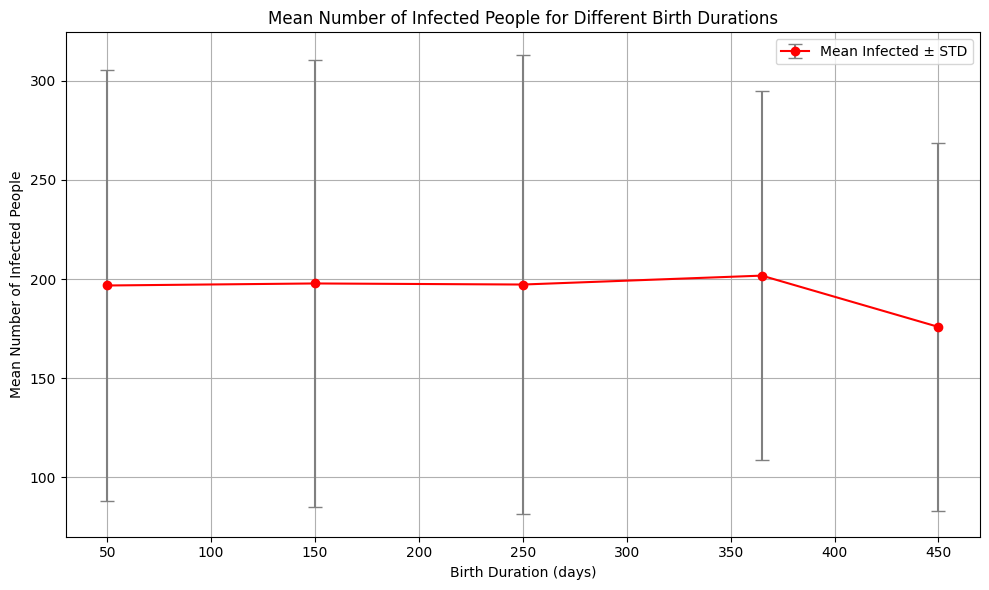

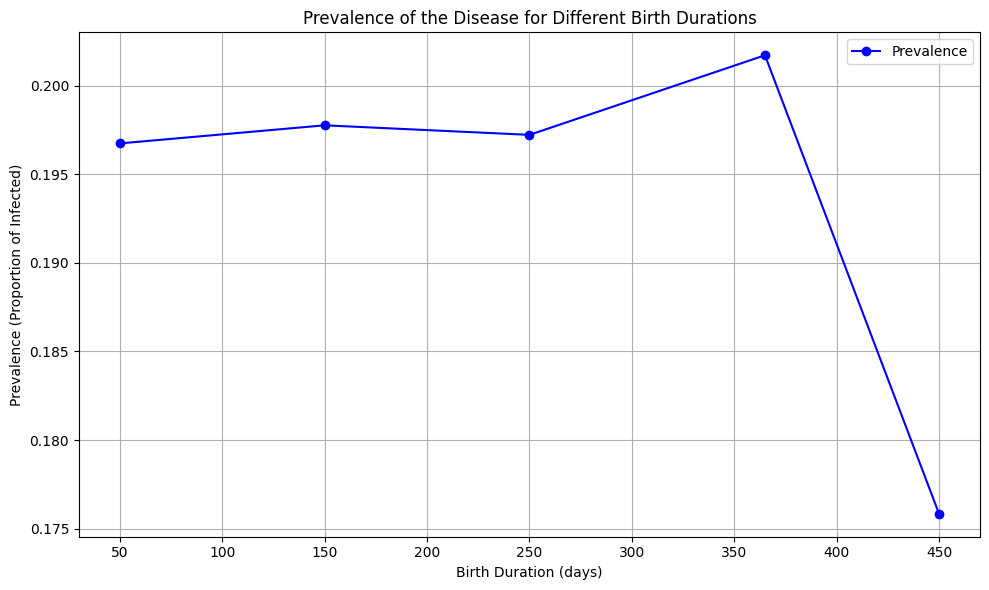

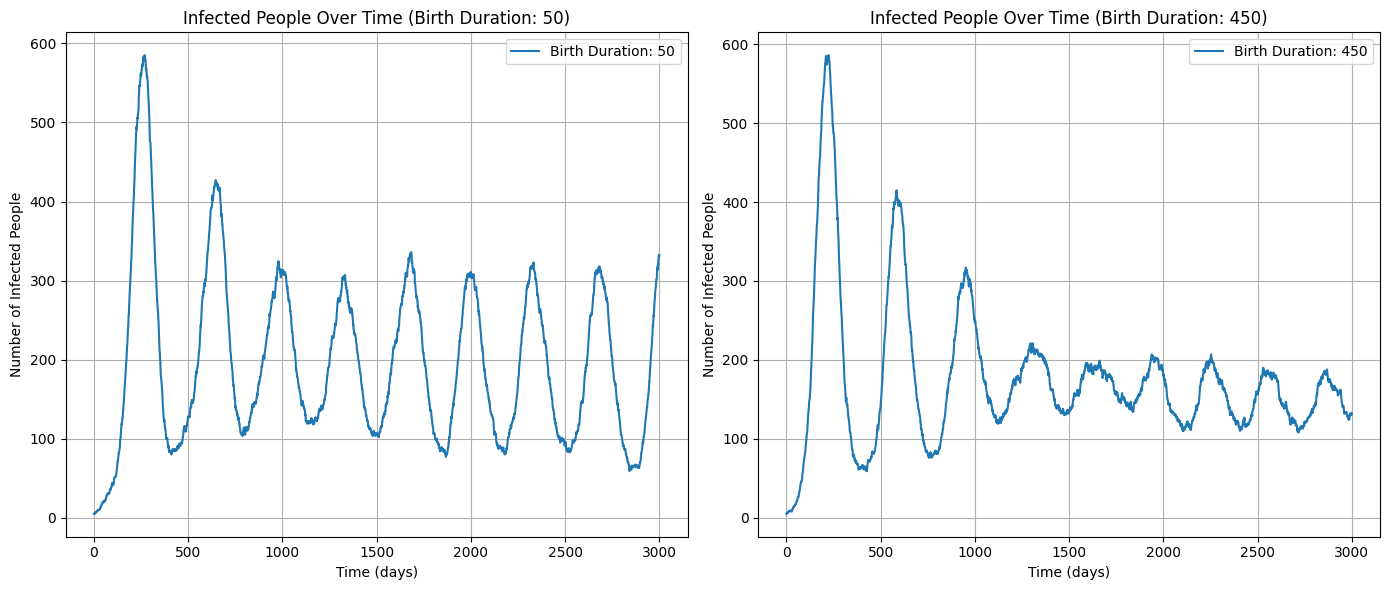

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the simulation
number_of_agents = 1000  # Number of agents (constant)
simulation_duration = 3000  # Duration of the simulation in days
birth_rate = 0.3  # Yearly birth rate (constant)
birth_duration_values = np.array([50, 150, 250, 365, 450])  # Example birth durations to investigate
infected_at_start = 5  # Initial number of infected individuals
N_ = 500  # Parameter specific to the simulation
R0_ = 2
immunity_mean = 180  # Keep immunity_mean constant
immunity_std = 60  # Keep immunity_std constant
infection_mean = 100  # Keep infection_mean constant
infection_std = 20  # Standard deviation of infection duration (keep constant)

# Step 1: Run the simulation for each birth duration value
mean_infected_per_birth_duration = []
std_infected_per_birth_duration = []
prevalence_per_birth_duration = []
infected_over_time_per_birth_duration = []

for birth_duration in birth_duration_values:
    # Assuming simulation_run returns a list/array of infected people counts over time
    infected_over_time, _, _, _ = simulation_run(number_of_agents, simulation_duration, birth_rate, birth_duration,
                                                 infected_at_start, R0_, N_, immunity_mean, immunity_std, infection_mean, infection_std)

    # Compute the mean and standard deviation of the number of infected people over the simulation duration
    mean_infected = np.mean(infected_over_time)
    std_infected = np.std(infected_over_time)

    mean_infected_per_birth_duration.append(mean_infected)
    std_infected_per_birth_duration.append(std_infected)

    # Compute the prevalence over the simulation duration
    prevalence = mean_infected / number_of_agents
    prevalence_per_birth_duration.append(prevalence)

    # Store infected over time for the first and last birth duration values
    if birth_duration == birth_duration_values[0] or birth_duration == birth_duration_values[-1]:
        infected_over_time_per_birth_duration.append((birth_duration, infected_over_time))

# Convert to numpy arrays for easier manipulation
mean_infected_per_birth_duration = np.array(mean_infected_per_birth_duration)
std_infected_per_birth_duration = np.array(std_infected_per_birth_duration)
prevalence_per_birth_duration = np.array(prevalence_per_birth_duration)

# Plotting the impact of birth duration on mean infected people and prevalence
plt.figure(figsize=(10, 6))

plt.errorbar(birth_duration_values, mean_infected_per_birth_duration, yerr=std_infected_per_birth_duration, fmt='o-', color='red', ecolor='gray', capsize=5, label='Mean Infected ± STD')
plt.xlabel('Birth Duration (days)')
plt.ylabel('Mean Number of Infected People')
plt.title('Mean Number of Infected People for Different Birth Durations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting prevalence for different birth duration values
plt.figure(figsize=(10, 6))

plt.plot(birth_duration_values, prevalence_per_birth_duration, marker='o', linestyle='-', color='blue', label='Prevalence')
plt.xlabel('Birth Duration (days)')
plt.ylabel('Prevalence (Proportion of Infected)')
plt.title('Prevalence of the Disease for Different Birth Durations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting infected people over time for the first and last birth duration values
plt.figure(figsize=(14, 6))
# Plot for the first birth duration value
birth_duration_first, infected_over_time_first = infected_over_time_per_birth_duration[0]
plt.subplot(1, 2, 1)
plt.plot(range(simulation_duration), infected_over_time_first, label=f'Birth Duration: {birth_duration_first}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Birth Duration: {birth_duration_first})')
plt.legend()
plt.grid(True)

# Plot for the last birth duration value
birth_duration_last, infected_over_time_last = infected_over_time_per_birth_duration[-1]
plt.subplot(1, 2, 2)
plt.plot(range(simulation_duration), infected_over_time_last, label=f'Birth Duration: {birth_duration_last}')
plt.xlabel('Time (days)')
plt.ylabel('Number of Infected People')
plt.title(f'Infected People Over Time (Birth Duration: {birth_duration_last})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
